# Speech Separation Demo 


Based on [Source Separation](https://colab.research.google.com/drive/1YxsMW1KNqP1YihNUcfrjy0zUp7FhNNhN?usp=sharing) tutorial by Speechbrain

## Setting up

In [2]:
import torch
import torchaudio
import torch.utils.data as data_utils 

## SepFormer

The system expects input recordings sampled at 8kHz (single channel).

In [35]:
from speechbrain.pretrained import SepformerSeparation as separator

setpFormer = separator.from_hparams(source="speechbrain/sepformer-whamr", savedir='pretrained_models/sepformer-wsj02mix')

# for custom file, change path
est_sources = setpFormer.separate_file(path='speechbrain/sepformer-whamr/test_mixture.wav') 

torchaudio.save("source1hat.wav", est_sources[:, :, 0].detach().cpu(), 8000)
torchaudio.save("source2hat.wav", est_sources[:, :, 1].detach().cpu(), 8000)


## Conv-TasNet

In [21]:
from asteroid.models import BaseModel
import soundfile as sf

!wget https://www.merl.com/demos/deep-clustering/media/female-female-mixture.wav

# 'from_pretrained' automatically uses the right model class (asteroid.models.DPRNNTasNet).
model = BaseModel.from_pretrained("mpariente/ConvTasNet_WHAM_sepclean")

# You can pass a NumPy array:
mixture, _ = sf.read("female-female-mixture.wav", dtype="float32", always_2d=True)
# Soundfile returns the mixture as shape (time, channels), and Asteroid expects (batch, channels, time)
mixture = mixture.transpose()
mixture = mixture.reshape(1, mixture.shape[0], mixture.shape[1])
out_wavs = model.separate(mixture)

# Or simply a file name:
model.separate("female-female-mixture.wav")

--2022-11-13 15:27:22--  https://www.merl.com/demos/deep-clustering/media/female-female-mixture.wav
Resolving www.merl.com (www.merl.com)... 137.203.190.5
Connecting to www.merl.com (www.merl.com)|137.203.190.5|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168680 (165K) [audio/x-wav]
Saving to: ‘female-female-mixture.wav.1’

female-female-mixtu 100%[===================>] 164,73K   443KB/s    in 0,4s    

2022-11-13 15:27:23 (443 KB/s) - ‘female-female-mixture.wav.1’ saved [168680/168680]



/home/melih/anaconda3/envs/speech_sep/lib/python3.10/site-packages/huggingface_hub/file_download.py:588: FutureWarning: `cached_download` is the legacy way to download files from the HF hub, please consider upgrading to `hf_hub_download`
  warnings.warn(
Downloading: 100%|██████████| 20.3M/20.3M [00:01<00:00, 10.4MB/s]
/home/melih/anaconda3/envs/speech_sep/lib/python3.10/site-packages/asteroid/separate.py:148: UserWarning: File female-female-mixture_est1.wav already exists, pass `force_overwrite=True` to overwrite it
  warnings.warn(


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display


In [33]:
est1 = sf.read("female-female-mixture_est1.wav")[0]
est2 = sf.read("female-female-mixture_est2.wav")[0]

Audio(est1, rate=8000)

In [24]:

def show_magspec(waveform, **kw):
    return librosa.display.specshow(
        librosa.amplitude_to_db(np.abs(librosa.stft(waveform))),
        y_axis="log", x_axis="time",
        **kw
    )


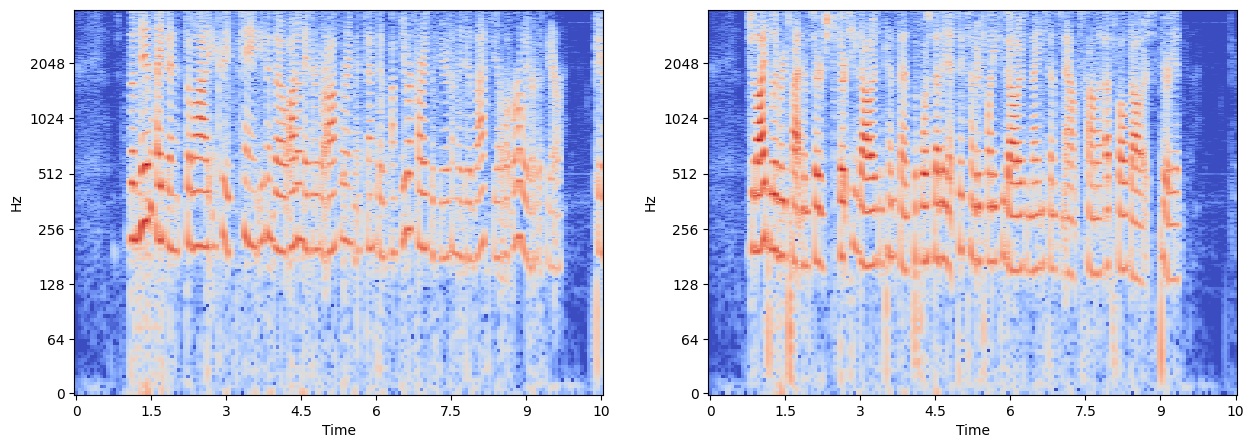

In [25]:

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
show_magspec(est1, sr=8000, ax=ax[0])
show_magspec(est2, sr=8000, ax=ax[1])

## Testing

In [26]:
mixture.shape

(1, 1, 84318)

In [30]:
from speechbrain.dataio.dataio import read_audio
from IPython.display import Audio

mixture_test = read_audio('test_mixture.wav').squeeze()
print(mixture_test.shape)

Audio(mixture_test, rate=8000)

torch.Size([16544])


In [ ]:
import pyaudio
 
FORMAT = pyaudio.paInt16
CHANNELS = 2
RATE = 44100
CHUNK = 1024
RECORD_SECONDS = 5
 
audio = pyaudio.PyAudio()
 
# start Recording
stream = audio.open(format=FORMAT, channels=CHANNELS,
                rate=RATE, input=True,
                frames_per_buffer=CHUNK)
print("recording...")
frames = []
 
for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data)
print("finished recording")
 
# stop Recording
stream.stop_stream()
stream.close()
audio.terminate()

In [36]:
est_sources = setpFormer.separate_file(path='female-female-mixture.wav') 


In [38]:
est_sources.shape

torch.Size([1, 84318, 2])

In [39]:
Audio(est_sources[:, :, 0].detach().cpu(), rate=8000)

In [40]:
Audio(est_sources[:, :, 1].detach().cpu(), rate=8000)


In [61]:
from speechbrain.pretrained.fetching import fetch
from speechbrain.utils.data_utils import split_path

path = 'speechbrain/sepformer-whamr/test_mixture.wav' 

In [70]:
!wget https://raw.githubusercontent.com/speechbrain/speechbrain/develop/tests/samples/noise/noise1.wav
!wget https://raw.githubusercontent.com/speechbrain/speechbrain/develop/tests/samples/noise/noise2.wav
!wget https://raw.githubusercontent.com/speechbrain/speechbrain/develop/tests/samples/noise/noise3.wav
!wget https://raw.githubusercontent.com/speechbrain/speechbrain/develop/tests/samples/noise/noise4.wav
!wget https://raw.githubusercontent.com/speechbrain/speechbrain/develop/tests/samples/noise/noise5.wav

--2022-11-13 18:54:39--  https://raw.githubusercontent.com/speechbrain/speechbrain/develop/tests/samples/noise/noise1.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8000::154, 2606:50c0:8001::154, 2606:50c0:8003::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8000::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1059988 (1,0M) [audio/wav]
Saving to: ‘noise1.wav’

noise1.wav          100%[===================>]   1,01M  6,71MB/s    in 0,2s    

2022-11-13 18:54:40 (6,71 MB/s) - ‘noise1.wav’ saved [1059988/1059988]

--2022-11-13 18:54:41--  https://raw.githubusercontent.com/speechbrain/speechbrain/develop/tests/samples/noise/noise2.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8000::154, 2606:50c0:8001::154, 2606:50c0:8003::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8000::154|:443... connected.
HTTP request s

In [72]:
noise_1 = read_audio('noise1.wav').squeeze()
Audio(noise_1, rate=8000)

In [73]:
noise_1.shape

torch.Size([529972])

In [74]:
import wave

In [76]:
wf = wave.open("noise1.wav", 'rb')

In [80]:
wf.getnframes() / 8000

66.2465

In [86]:
%%capture
!wget https://www.dropbox.com/sh/07vwpwru6qo6yhf/AADx5I8oV0IdekCf80MSkxMia/mixture_0.wav -O assets/mixture_0.wav
!wget https://www.dropbox.com/sh/07vwpwru6qo6yhf/AAAZI7ZezKyHFGPdus6hn2v_a/mixture_1.wav -O assets/mixture_1.wav
!wget https://www.dropbox.com/sh/07vwpwru6qo6yhf/AACh4Yy4H-Ii2I0mr_b1lQdXa/mixture_2.wav -O assets/mixture_2.wav
!wget https://www.dropbox.com/sh/07vwpwru6qo6yhf/AAAenTlEsoj1-AGbCxeJfMHoa/mixture_3.wav -O assets/mixture_3.wav
!wget https://www.dropbox.com/sh/07vwpwru6qo6yhf/AAC-awQo-9NFVVULuVwaHKKWa/source1_0.wav -O assets/source1_0.wav
!wget https://www.dropbox.com/sh/07vwpwru6qo6yhf/AABVKWtdVhXZE6Voq1I_c6g5a/source1_1.wav -O assets/source1_1.wav
!wget https://www.dropbox.com/sh/07vwpwru6qo6yhf/AAC9EfjTTwL0dscH16waP9s-a/source1_2.wav -O assets/source1_2.wav
!wget https://www.dropbox.com/sh/07vwpwru6qo6yhf/AAC5Ozb4rS9qby268JSIy5Uwa/source1_3.wav -O assets/source1_3.wav
!wget https://www.dropbox.com/sh/07vwpwru6qo6yhf/AABlonG910Ms2l-rTN5ct3Oka/source2_0.wav -O assets/source2_0.wav
!wget https://www.dropbox.com/sh/07vwpwru6qo6yhf/AACDOqEgyXIeA2r1Rkf7VgQTa/source2_1.wav -O assets/source2_1.wav
!wget https://www.dropbox.com/sh/07vwpwru6qo6yhf/AACTYGAG0LOh6HvxpVYoqO_Da/source2_2.wav -O assets/source2_2.wav
!wget https://www.dropbox.com/sh/07vwpwru6qo6yhf/AACPmq-ZJNzfh4bnO34_8mfAa/source2_3.wav -O assets/source2_3.wav

In [83]:
from utils import download_speakers

In [87]:
read_audio('assets/mixture_1.wav')

tensor([-0.0206, -0.0237, -0.0263,  ..., -0.0378, -0.0327, -0.0252])